In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
import os
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import re
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("C:/Users/user/vis")

In [3]:
times = pd.read_excel("times_final_withCountry.xlsx")
cwur  = pd.read_csv("cwur_final_withCountry.csv")
shanghai  = pd.read_csv("shanghai_final_withCountry1.csv")

expend = pd.read_excel("education_expenditure_supplementary_data.xlsx")

In [4]:
expend.columns

Index([                'country',          'institute_type',
       'direct_expenditure_type',                      1995,
                            2000,                      2005,
                            2009,                      2010,
                            2011],
      dtype='object')

In [5]:
expend['country'] = expend['country'].apply(lambda x :re.sub("United Kingdom","UK",x))
expend['country'] = expend['country'].apply(lambda x :re.sub("Korea, Republic of","SouthKorea",x))
expend['country'] = expend['country'].apply(lambda x :re.sub("Czech Republic","CzechRepublic",x))
expend['country'] = expend['country'].apply(lambda x :re.sub("New Zealand","NewZealand",x))
expend['country'] = expend['country'].apply(lambda x :re.sub("Slovak Republic","Slovakia",x))
expend['country'] = expend['country'].apply(lambda x :re.sub("Russian Federation","Russia",x))

In [6]:
expend

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN
329,UK,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,1.2
330,United States,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,2.7
331,Brazil,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN


# cwur

In [8]:
cwur_top = cwur[(cwur['world_rank'] < 100) & (cwur['year'] == 2012)]
cwur_top = cwur_top[['country',"world_rank"]].groupby('country').count().reset_index()
cwur_top

,country,world_rank
0,Australia,2
1,Canada,3
2,Denmark,1
3,Finland,1
4,France,4
5,Germany,3
6,Israel,4
7,Italy,1
8,Japan,5
9,Netherlands,2


In [9]:
cwur_top_expend = pd.merge(cwur_top, expend[['country','institute_type','direct_expenditure_type',2011]])
cwur_top_expend.rename(columns = {2011 : "value"},inplace = True)
cwur_top_expend.head()

,country,world_rank,institute_type,direct_expenditure_type,value
0,Australia,2,All Institutions,Public,4.3
1,Australia,2,Elementary and Secondary Institutions,Public,3.5
2,Australia,2,Higher Education Institutions,Public,0.7
3,Australia,2,All Institutions,Private,1.5
4,Australia,2,Elementary and Secondary Institutions,Private,0.6


In [10]:
cwur_top_expend_1 = cwur_top_expend[(cwur_top_expend['institute_type'] == "All Institutions ") & (cwur_top_expend['direct_expenditure_type'] == "Public")]

,country,world_rank,institute_type,direct_expenditure_type,value
0,Australia,2,All Institutions,Public,4.3
9,Canada,3,All Institutions,Public,NaN
18,Denmark,1,All Institutions,Public,7.5
27,Finland,1,All Institutions,Public,6.3
36,France,4,All Institutions,Public,5.6
45,Germany,3,All Institutions,Public,4.4
54,Israel,4,All Institutions,Public,5.6
63,Italy,1,All Institutions,Public,4.2
72,Japan,5,All Institutions,Public,3.6
81,Netherlands,2,All Institutions,Public,5.3


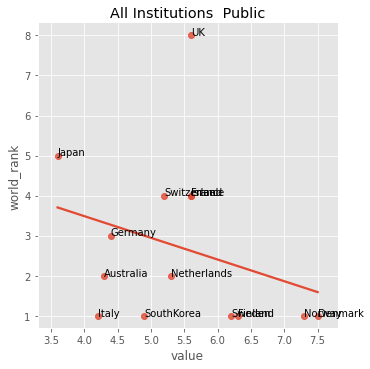

In [11]:
cwur_top_expend_1 = cwur_top_expend_1.dropna()
ax = sns.lmplot(x = 'value', y = 'world_rank', ci = None,data = cwur_top_expend_1)
plt.title("All Institutions  Public")
plt.xlim(min(cwur_top_expend_1['value'])-0.3,max(cwur_top_expend_1['value'])+0.3)
plt.ylim(min(cwur_top_expend_1['world_rank'])-0.3,max(cwur_top_expend_1['world_rank'])+0.3)

for i,j,k in zip(cwur_top_expend_1['value'],cwur_top_expend_1['world_rank'],cwur_top_expend_1['country']):
    plt.text(i, j,k)

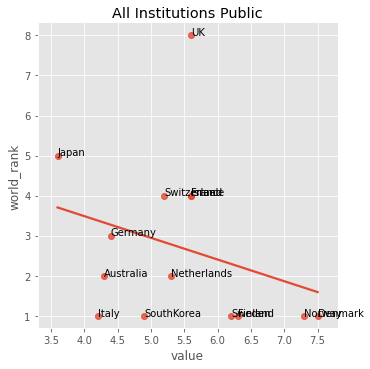

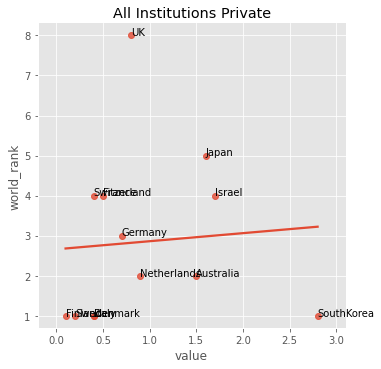

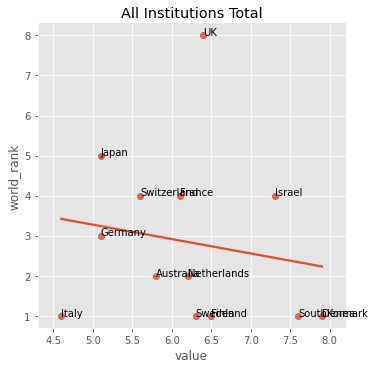

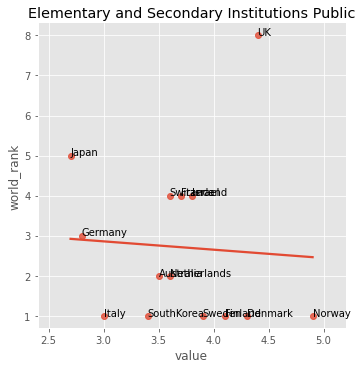

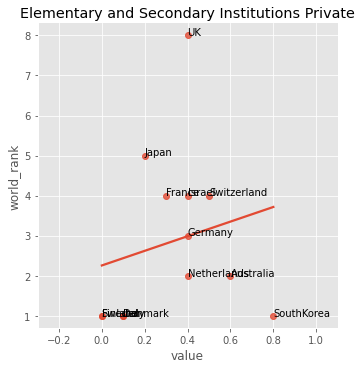

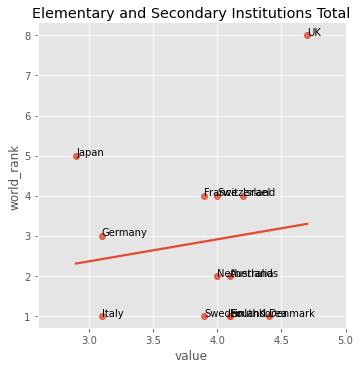

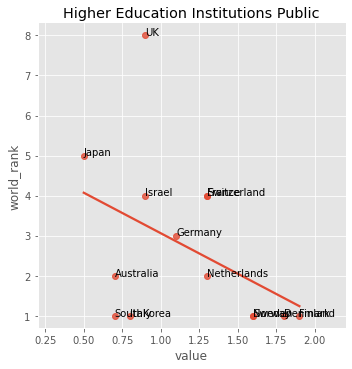

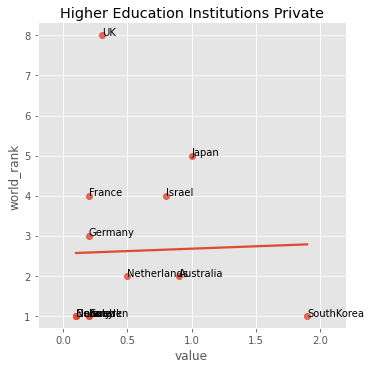

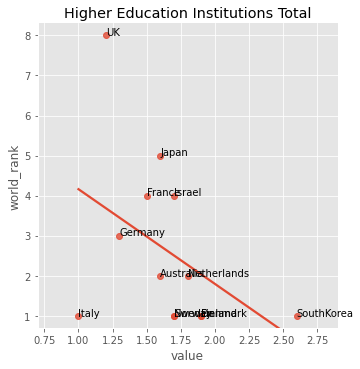

In [12]:
for ins_type in cwur_top_expend['institute_type'].unique():
    for direct_type in cwur_top_expend['direct_expenditure_type'].unique():
        tmp = cwur_top_expend[(cwur_top_expend['institute_type'] == ins_type) & 
                                            (cwur_top_expend['direct_expenditure_type'] ==  direct_type)]
        tmp = tmp.dropna()
        ax = sns.lmplot(x = 'value', y = 'world_rank', ci = None,data = tmp)
        plt.title(ins_type + direct_type)
        plt.xlim(min(tmp['value'])-0.3,max(tmp['value'])+0.3)
        plt.ylim(min(tmp['world_rank'])-0.3,max(tmp['world_rank'])+0.3)

        for i,j,k in zip(tmp['value'],tmp['world_rank'],tmp['country']):
            plt.text(i, j,k)
        plt.savefig(ins_type + "_" +direct_type  + '.png', width=150,height = 150)

# Times

In [13]:
times_top = times[(times['world_rank'] < 100) & (times['year'] == 2012)]
times_top = times_top[['country',"world_rank"]].groupby('country').count().reset_index()
times_top_expend = pd.merge(times_top, expend[['country','institute_type','direct_expenditure_type',2011]])
times_top_expend.rename(columns = {2011 : "value"},inplace = True)
times_top_expend.head()

,country,world_rank,institute_type,direct_expenditure_type,value
0,Australia,4,All Institutions,Public,4.3
1,Australia,4,Elementary and Secondary Institutions,Public,3.5
2,Australia,4,Higher Education Institutions,Public,0.7
3,Australia,4,All Institutions,Private,1.5
4,Australia,4,Elementary and Secondary Institutions,Private,0.6


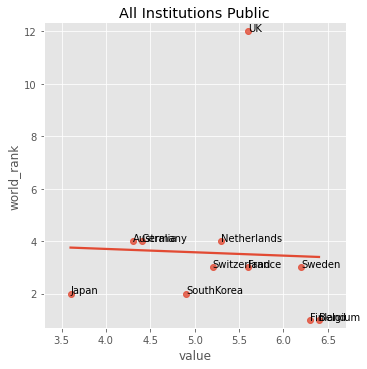

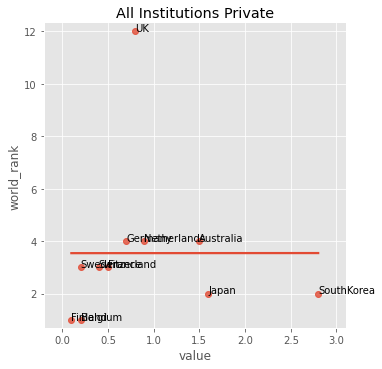

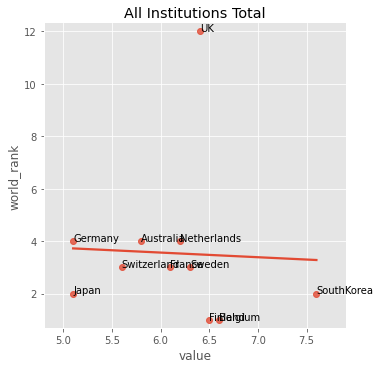

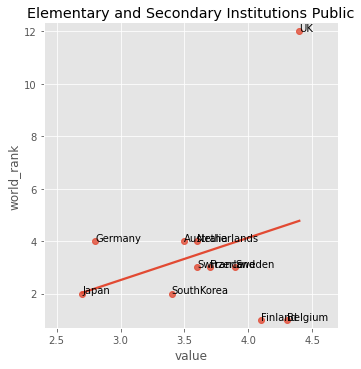

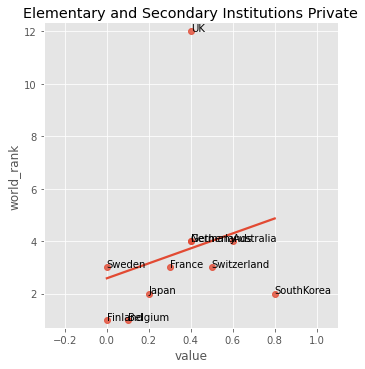

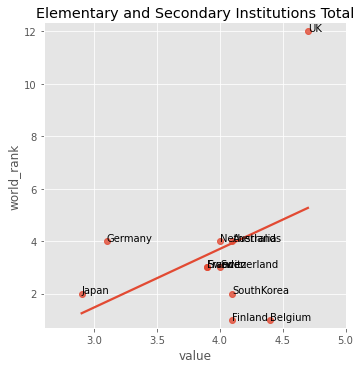

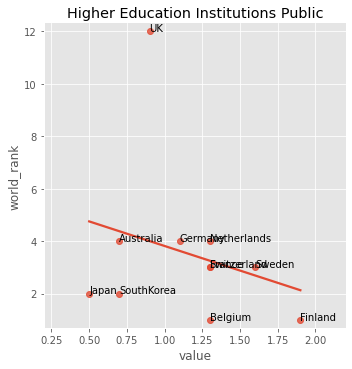

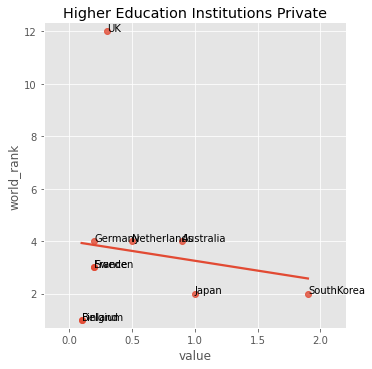

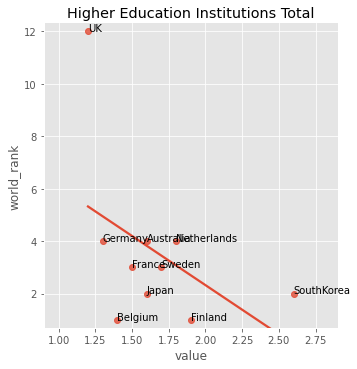

In [14]:
for ins_type in times_top_expend['institute_type'].unique():
    for direct_type in times_top_expend['direct_expenditure_type'].unique():
        tmp = times_top_expend[(times_top_expend['institute_type'] == ins_type) & 
                                            (times_top_expend['direct_expenditure_type'] ==  direct_type)]
        tmp = tmp.dropna()
        ax = sns.lmplot(x = 'value', y = 'world_rank', ci = None,data = tmp)
        plt.title(ins_type + direct_type)
        plt.xlim(min(tmp['value'])-0.3,max(tmp['value'])+0.3)
        plt.ylim(min(tmp['world_rank'])-0.3,max(tmp['world_rank'])+0.3)

        for i,j,k in zip(tmp['value'],tmp['world_rank'],tmp['country']):
            plt.text(i, j,k) 

# Shanghai

In [15]:
shanghai

,Unnamed: 0,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country
0,0,1,Harvard University,1,100.000000,100.0,100.0,100.0,100.0,100.0,71.1,2012,USA
1,1,2,Stanford University,2,72.800000,38.0,79.7,88.9,71.6,69.6,49.2,2012,USA
2,2,3,Massachusetts Institute of Technology (MIT),3,71.800000,69.0,83.2,68.2,69.2,61.6,64.1,2012,USA
3,3,4,"University of California, Berkeley",4,71.600000,67.5,80.9,69.7,68.5,68.1,53.4,2012,USA
4,4,5,University of Cambridge,1,69.800000,80.3,97.2,54.6,55.0,65.9,52.1,2012,UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,450,University of Trieste,20-11,10.454738,0.0,0.0,5.0,10.9,25.1,20.1,2015,Italy
1378,1378,450,University of Zaragoza,13-9,10.763708,0.0,0.0,7.6,5.1,33.3,13.1,2015,Spain
1379,1379,450,Utah State University,126-146,11.074049,13.6,0.0,3.6,10.8,25.1,15.5,2015,USA
1380,1380,450,Vienna University of Technology,06-4,10.740216,0.0,0.0,0.0,12.2,28.8,22.9,2015,Austria


In [16]:
shanghai_top = shanghai[(shanghai['world_rank'] < 100) & (shanghai['year'] == 2012)]
shanghai_top = shanghai_top[['country',"world_rank"]].groupby('country').count().reset_index()
shanghai_top_expend = pd.merge(shanghai_top, expend[['country','institute_type','direct_expenditure_type',2011]])
shanghai_top_expend.rename(columns = {2011 : "value"},inplace = True)
shanghai_top_expend.head()

,country,world_rank,institute_type,direct_expenditure_type,value
0,Australia,5,All Institutions,Public,4.3
1,Australia,5,Elementary and Secondary Institutions,Public,3.5
2,Australia,5,Higher Education Institutions,Public,0.7
3,Australia,5,All Institutions,Private,1.5
4,Australia,5,Elementary and Secondary Institutions,Private,0.6


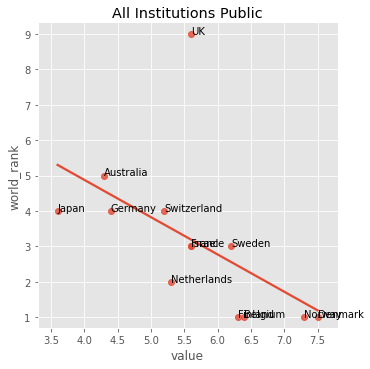

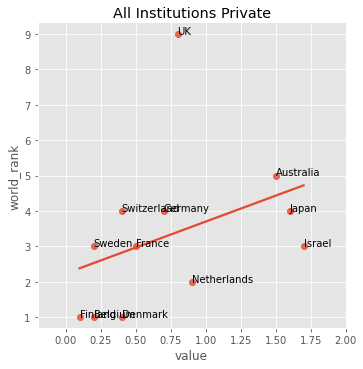

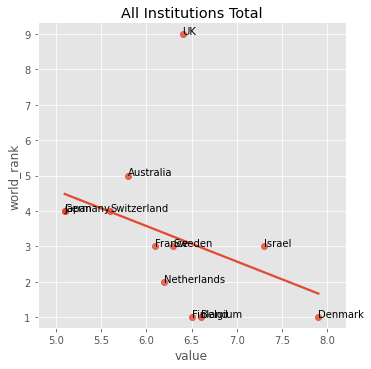

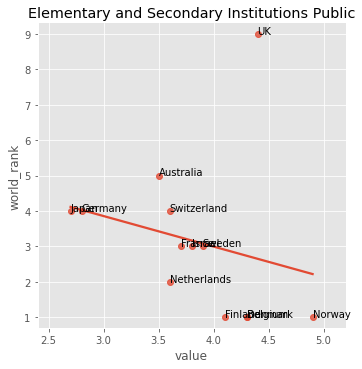

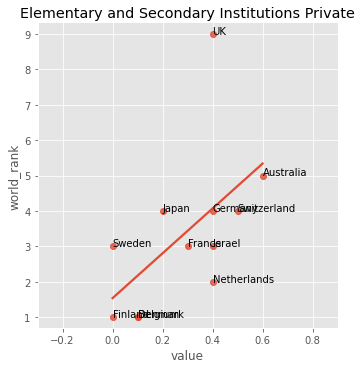

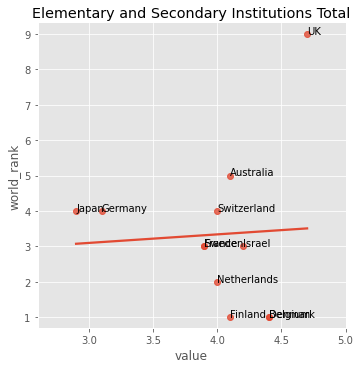

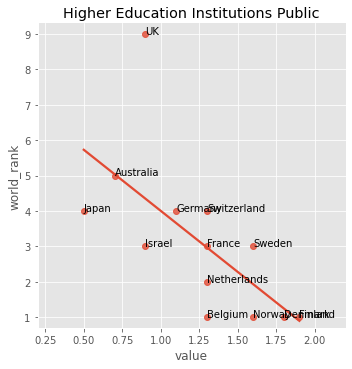

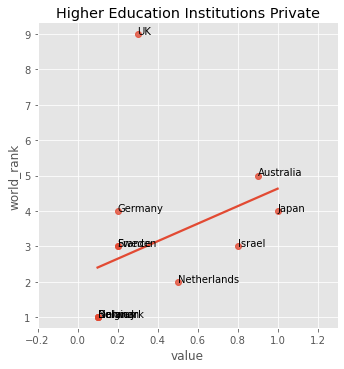

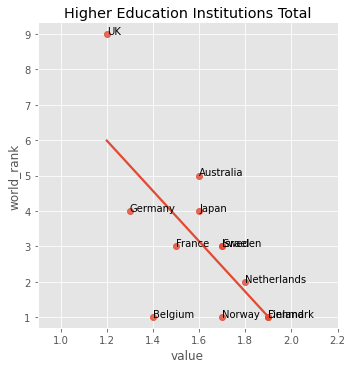

In [18]:
for ins_type in shanghai_top_expend['institute_type'].unique():
    for direct_type in times_top_expend['direct_expenditure_type'].unique():
        tmp = shanghai_top_expend[(shanghai_top_expend['institute_type'] == ins_type) & 
                                            (shanghai_top_expend['direct_expenditure_type'] ==  direct_type)]
        tmp = tmp.dropna()
        ax = sns.lmplot(x = 'value', y = 'world_rank', ci = None,data = tmp)
        plt.title(ins_type + direct_type)
        plt.xlim(min(tmp['value'])-0.3,max(tmp['value'])+0.3)
        plt.ylim(min(tmp['world_rank'])-0.3,max(tmp['world_rank'])+0.3)

        for i,j,k in zip(tmp['value'],tmp['world_rank'],tmp['country']):
            plt.text(i, j,k)